In [1]:
%%capture
cd ..

In [2]:
import pandas as pd
import pytest
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

from survival_data_handler.main import SurvivalEstimation, Lifespan, TimeCurveData
from survival_data_handler.utils import smooth, process_survival_function, \
    compute_derivative
from survival_data_handler.base import TimeCurveInterpolation


In [9]:
rossi = load_rossi()
cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')
curves = cph.predict_survival_function(rossi).T
curves.columns = pd.to_timedelta(curves.columns.to_numpy() * 7, unit="D")

rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [11]:
curves.iloc[:5, :10]

,7 days,14 days,21 days,28 days,35 days,42 days,49 days,56 days,63 days,70 days
0,0.997616,0.995230,0.992848,0.990468,0.988085,0.985699,0.983305,0.971402,0.966614,0.964223
1,0.993695,0.987411,0.981162,0.974941,0.968739,0.962552,0.956370,0.926001,0.913958,0.907978
2,0.994083,0.988183,0.982314,0.976468,0.970639,0.964820,0.959004,0.930402,0.919043,0.913399
3,0.999045,0.998089,0.997133,0.996176,0.995216,0.994254,0.993287,0.988460,0.986508,0.985531
4,0.997626,0.995250,0.992878,0.990507,0.988135,0.985758,0.983374,0.971520,0.966752,0.964370


$S(t) = \mathbb{P}(T < t)$

C:\Users\Vincent LAURENT\PROJETS\tools\survival-data-handler\survival_data_handler\base.py:72: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.__interpolation = {


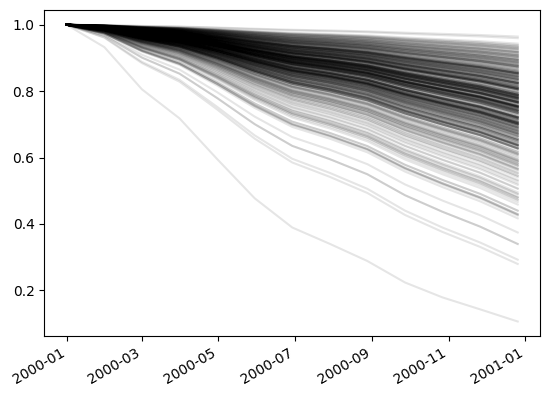

In [4]:
age = pd.to_timedelta(rossi["age"] * 365.25, unit="D")
birth = pd.to_datetime('2000')
rossi["index"] = rossi.index
lifespan = Lifespan(
    curves,
    index=rossi["index"],
    birth=birth,
    age=age,
    window=(pd.to_datetime("2000"), pd.to_datetime("2001"))
)
lifespan.survival_function.T.plot(legend=False, color="k", alpha=0.1)
print()

$h(t) =-S'(t) / S(t)$

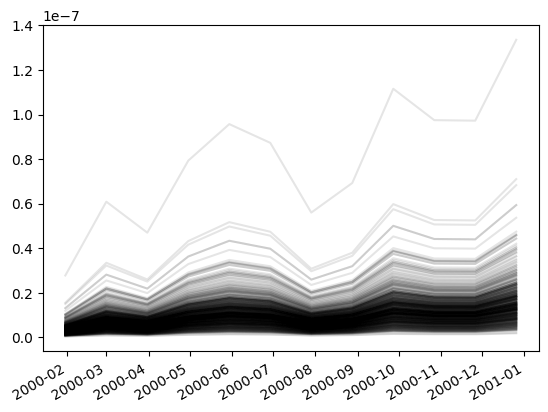

In [5]:
lifespan.hazard_function.T.plot(legend=False, color="k", alpha=0.1)
print()

$f(t) =-S'(t)$

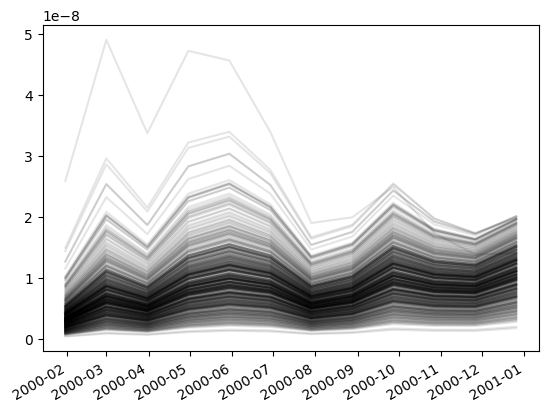

In [6]:
lifespan.density_function.T.plot(legend=False, color="k", alpha=0.1)
print()

$\Lambda (t) = -log(S(t)) $

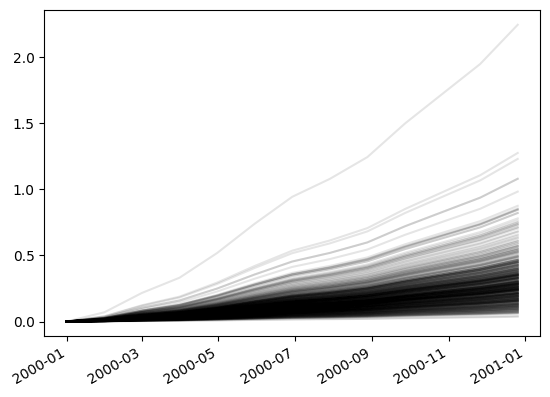

In [7]:
lifespan.cumulative_hazard_function.T.plot(legend=False, color="k", alpha=0.1)
print()

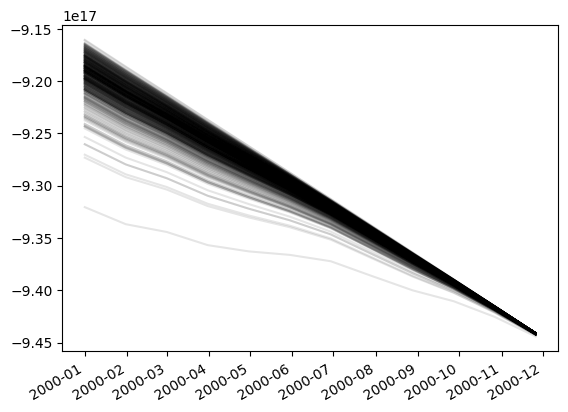

In [8]:
lifespan.residual_life.T.plot(legend=False, color="k", alpha=0.1)
print()